# Scikit-Learn

By: Rafael M. Martins (rafael.martins@lnu.se)

Official site with documentation and (many) more examples and tutorials: http://scikit-learn.org

Some of the content in this notebook was reused or adapted from the excellent tutorial by Jake VanDerPlas (https://github.com/jakevdp/sklearn_tutorial).

## Introduction

Scikit-learn is a python library for machine learning that is not the fastest, not the most advanced, but (probably) the easiest to use and to get started with. With scikit-learn you can get a working model in a matter of minutes with a couple of lines of code.

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import svm

### Data Format

The library comes with a few toy datasets that we can use to play with the Machine Learning (ML) models and learn how to use the correct classes and modules. These dataset objects have a `data` attribute that is a 2-D `numpy` array that stores the data itself, in the shape `(n_samples, n_features)`. 

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.
  
![Data Layout](images/data-layout.png)

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

Below we load the `digits` dataset, which consists of a collection of low-resolution images of handwritten digits scanned from paper. The task is to identify which actual digit (0-9) they represent. One thing that is important to notice about this dataset is that the features are the gray-scale intensities of each pixel, but each bitmap (sample) is *flattened* into a 1-D vector. This is necessary because the input data in scikit-learn must always be in the shape `(samples, features)`.

Dataset: Handwritten digits

Shape: (1797, 64) 

First sample:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

Examples:


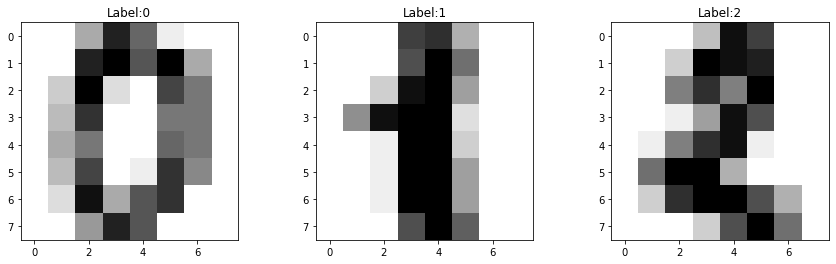

In [3]:
# Load the 'handwritten digits' dataset
digits = datasets.load_digits()

print('Dataset: Handwritten digits\n')

print('Shape:', digits.data.shape, '\n')
print('First sample:\n', digits.data[0], '\n')

# The digits dataset also has an 'images' attribute with the actual reshaped pixels
print('Examples:')
fig = plt.figure(figsize=(15,4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    #ax.imshow(digits.images[i], cmap=plt.cm.binary)
    ax.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.binary)
    ax.set_title('Label:' + str(digits.target[i]))

plt.show()

Below we fit a simple Support Vector Machine (SVM) classifier using the features and the labels we have. The parameters are usually given when instantiating the model, but they can also be changed later with the method `set_params`. The classifier is trained with all but one of the samples, then we test the model with the sample that was left out.

Train Score: 1.0

Test sample:


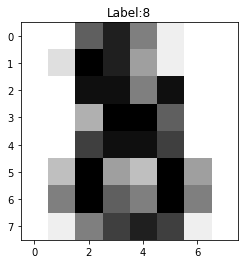

Predicted: 5
Test Score: 0.0


In [6]:
# Fit a very simple SVM classifier with all but one sample from the input data
clf = svm.SVC(gamma='auto')

X_train, y_train = digits.data[:-1], digits.target[:-1]

clf.fit(X_train, y_train)

# Check the score on the training set itself
print('Train Score:', clf.score(X_train, y_train))

X_test, y_test = [digits.data[-1]], [digits.target[-1]]

# Predict the label for the last sample
y = clf.predict(X_test)

print('\nTest sample:')
plt.imshow(digits.data[-1].reshape(8,8), cmap=plt.cm.binary)
plt.title('Label:' + str(y_test[0]))
plt.show()

print('Predicted:', y[0])
print('Test Score:', clf.score(X_test, y_test))

As you can see, the model performs perfectly with the training set, but fails with the first external sample we feed into it. This is because the model is *overfitted*, that is, it is optimized too much to work with the training data.

Trying with new parameter settings...


Test sample:


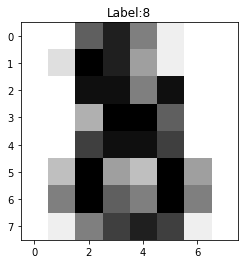

Predicted: 8
Train Score: 1.0
Test Score: 1.0


In [10]:
# Let's try it with some different parameters
print('Trying with new parameter settings...\n')

# You could've also simply instantiated a new object like this:
#clf = svm.SVC(gamma=0.001, C=100.)

# This kind of chaining works because most methods return the object itself
y = clf.set_params(C=100., gamma=0.001).fit(X_train, y_train).predict(X_test)

print('\nTest sample:')
plt.imshow(digits.data[-1].reshape(8,8), cmap=plt.cm.binary)
plt.title('Label:' + str(y_test[0]))
plt.show()

print('Predicted:', y[0])
print('Train Score:', clf.score(X_train, y_train))
print('Test Score:', clf.score(X_test, y_test))

A bit of hyperparameter tweaking and we already got a better result. Finding the right hyperparameters is not trivial, as their effect is usually not obvious (so it becomes a process of trial and error). In a future lecture we will see how to automate the hyperparameter search. 

The standardized API of scikit-learn is maybe its strongest selling point. Below we replace the classifier with another one simply by instantiating another class (notice that the rest of the method calls and the general workflow are mostly the same).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

print('KNN classifier\n')

# Cross-validation; you could've done it yourself, but...
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.4, random_state=42)

print('Length of training set:', len(X_train))
print('Length of testing set:', len(X_test))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('\nTraining score:', knn.score(X_train, y_train))
# Notice that I did not predict; it is not necessary, unless I want to use the predicted labels for something else
print('Testing score:', knn.score(X_test, y_test))

# It's also possible to do this with KNN:
y_p = knn.predict_proba(X_test)
print('\nExample of prob. prediction:')
print(y_p[535])

KNN classifier

Length of training set: 1078
Length of testing set: 719

Training score: 0.9888682745825603
Testing score: 0.9888734353268428

Example of prob. prediction:
[0.         0.33333333 0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]


In the above, the dataset has been broken down into the *training* set and the *testing* set, to avoid overfitting and to evaluate the real effectiveness of the model. This is good but, most of the time, not enough; unless you have a large amount of data, the training and testing sets might end up being too small. The K-fold cross validation done below is one of the ways to solve this problem.

In [ ]:
# K-fold cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict

clf_knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf_knn, digits.data, digits.target, cv=5)

print('KNN')
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

clf_svm = svm.SVC(gamma=0.001, C=100.)
scores = cross_val_score(clf_svm, digits.data, digits.target, cv=5)

print('\nSVM')
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

This should be enough to get you started with doing classification with scikit-learn. For more detailed information check https://scikit-learn.org/stable/supervised_learning.html.

Sometimes the fitting of a classifier can take a long time, specially considering that K-fold cross validation repeats the process multiple times (and it gets worse when you are searching for good hyperparameter settings). It is very useful to be able to save the model after the fitting, so you can apply it later with unknown data. The `pickle` module allows you to do that in an easy way.

In [ ]:
import pickle

# save to disk
with open('.clf_svm', 'wb') as f:
    pickle.dump(clf_svm, f)
    
# load from disk
with open('.clf_svm', 'rb') as f:
    clf_svm_loaded = pickle.load(f)

scores = cross_val_score(clf_svm_loaded, digits.data, digits.target, cv=5)

print("SVM model loaded from disk")
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))
